In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_csv = "data/Mouse_metadata.csv"
study_results_csv = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_csv = pd.read_csv(mouse_metadata_csv)
study_results_csv = pd.read_csv(study_results_csv)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata_csv, study_results_csv, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

# Pymaceuticals Inc.
---

### Analysis

Compared to the other treatements, Capomulin and Ramicane appear to be the most promising treatment regimen because on average, they resulted in the smallest tumor volumes. There was no indication gender distribution played a part in the results. 
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_csv = pd.read_csv(mouse_metadata_path)
study_results_csv = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
mouse_count =mouse_metadata_csv["Mouse ID"].count()
mouse_count

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = mouse_data_complete[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID.
if len(duplicate_mouse_ids) > 0:
    print("Mouse IDs with duplicate time points: ", duplicate_mouse_ids)
    duplicate_mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mouse_ids)]
    print("Data associated with duplicate mouse IDs:")
    print(duplicate_mouse_data)

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    clean_mouse_data= mouse_data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
else:
    print("No duplicate time points found in the data.")

Mouse IDs with duplicate time points:  ['g989']
Data associated with duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21 

In [21]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data['Mouse ID'].nunique()
mouse_count

249

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_groups = clean_mouse_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = regimen_groups['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
print(summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

regimen_counts = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']
print(regimen_counts)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


## Bar and Pie Charts

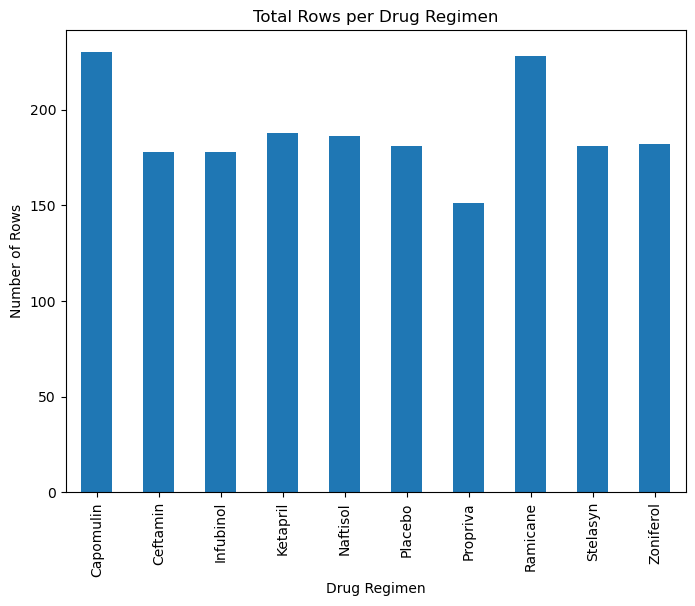

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts.plot(kind='bar', figsize=(8,6), title='Total Rows per Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()

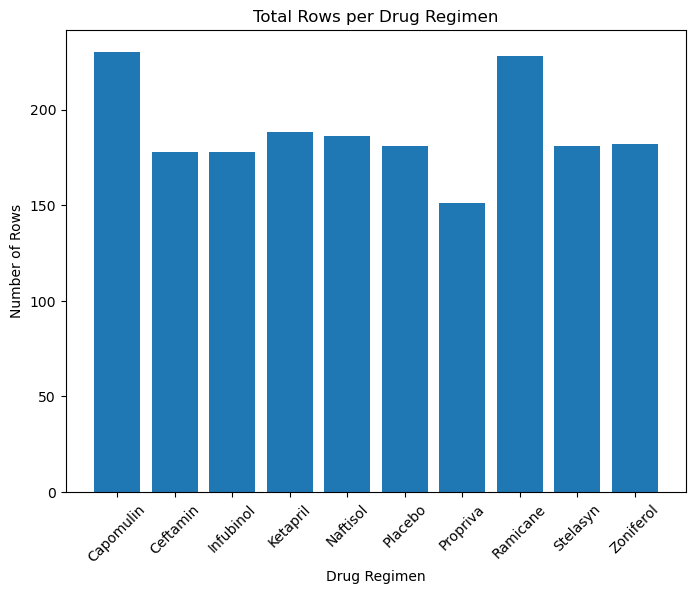

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8,6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribution of Female vs Male Mice Using Pandas')

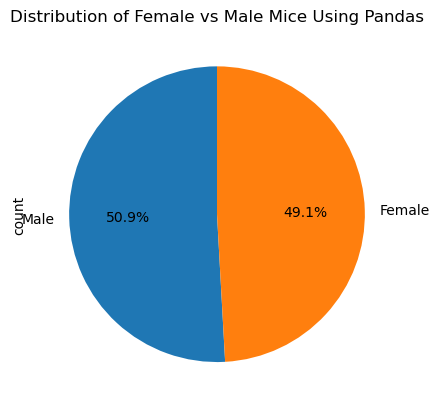

In [26]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts = clean_mouse_data['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice Using Pandas')

Text(0.5, 1.0, 'Distribution of Female vs Male Mice Using pyplot')

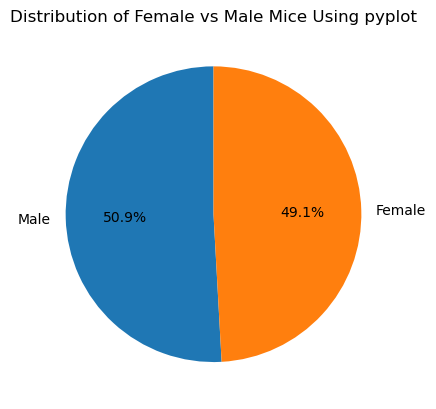

In [27]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts = clean_mouse_data['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice Using pyplot')


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
max_timepoint_df = max_timepoint_df.rename(columns={'Timepoint': 'Max Timepoint'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(clean_mouse_data, max_timepoint_df, on='Mouse ID')

In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
for drug in treatments:
        drug_data = merged_data.loc[merged_data['Drug Regimen'] == drug]
        final_tumor_volume = drug_data.loc[drug_data['Timepoint'] == drug_data['Max Timepoint']]['Tumor Volume (mm3)']
        tumor_volume_data.append(final_tumor_volume)

# Determine outliers using upper and lower bounds

for i, drug in enumerate(treatments):
    quartiles = tumor_volume_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]

    print(f"{drug} Potential Outliers: {outliers}")

Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


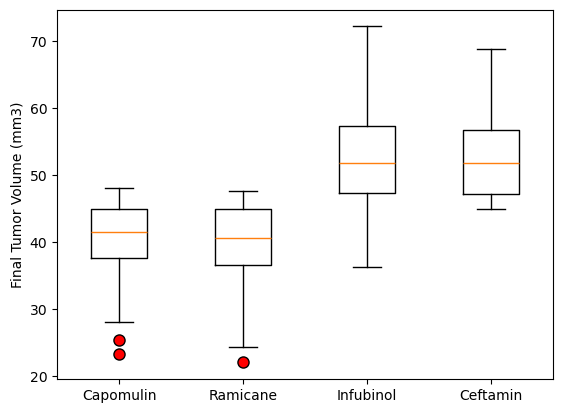

In [30]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_volumes = []

for drug in treatments:
    # Locate the rows in the merged DataFrame that correspond to each drug
    drug_data = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # Append the resulting final tumor volumes for each drug to the empty list
    final_volumes.append(drug_data)

fig, ax = plt.subplots()
ax.boxplot(final_volumes, labels=treatments, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

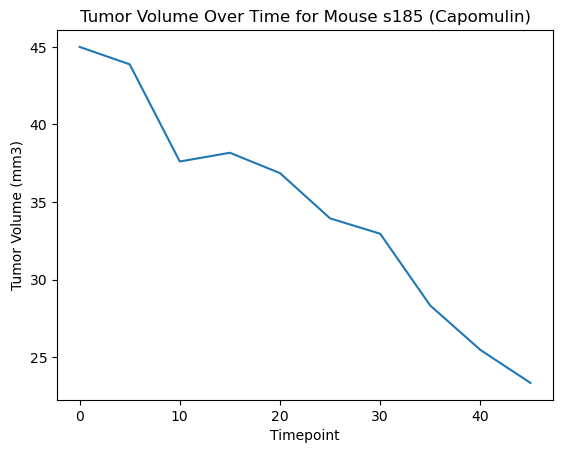

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

#data that includes only rows with drug regimen of Capomulin
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']
capomulin_mice = capomulin_data['Mouse ID'].unique()
selected_mouse = capomulin_mice[0]

#Filter the Capomulin to only include rows where the Mouse ID is the selected Mouse ID
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse]

#labels and titles
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume Over Time for Mouse {selected_mouse} (Capomulin)')

# Show the plot
plt.show()

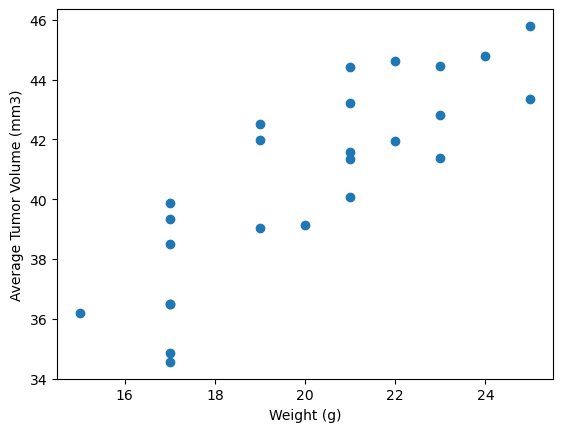

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# filter the data to only include Capomulin
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# average tumor volume for each mouse in the Capomulin
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# average tumor volume data with mouse metadata to get the weight for each mouse
capomulin_data_with_weight = pd.merge(avg_tumor_volume, mouse_metadata_csv, on='Mouse ID')

# Create the scatter plot
plt.scatter(capomulin_data_with_weight['Weight (g)'], capomulin_data_with_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
